## Classical Boolean Logic
<p style="text-align: center">AND Gate</p>
\begin{array}{|c c|c|}
x_0 & x_1 & x_0 \land x_1\\ 
\hline % Put a horizontal line between the table header and the rest.
0 & 0 & 0\\
0 & 1 & 0\\
1 & 0 & 0\\
1 & 1 & 1\\
\end{array}

<p style="text-align: center">OR Gate</p>
\begin{array}{|c c|c|}
x_0 & x_1 & x_0 \lor x_1\\ 
\hline % Put a horizontal line between the table header and the rest.
0 & 0 & 0\\
0 & 1 & 1\\
1 & 0 & 1\\
1 & 1 & 1\\
\end{array}

<p style="text-align: center">NAND Gate</p>
\begin{array}{|c c|c|}
x_0 & x_1 & \neg (x_0 \land x_1)\\ 
\hline % Put a horizontal line between the table header and the rest.
0 & 0 & 1\\
0 & 1 & 1\\
1 & 0 & 1\\
1 & 1 & 0\\
\end{array}

<p style="text-align: center">NOT Gate</p>
\begin{array}{|c|c|}
x_0 & \neg x_0\\ 
\hline % Put a horizontal line between the table header and the rest.
0 & 1\\
1 & 0\\
\end{array}

Quantum gates must be reversable such that $UU^\dagger$ = $U^\dagger U$ = $I$. Thus, for each output state there is a unique input state. <br>
Of the given classical gates, the not gate is the only one that is reversable, therefore we can represent it as a matrix that we will label $X$. <br>


In [13]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.circuitplot import circuit_plot
from sympy.physics.quantum.qubit import * # Package allows for easy quibit creation
from sympy.physics.quantum.gate import * # easy gate reference
init_printing()

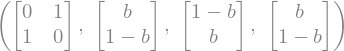

In [8]:
# define X
b = symbols("b")
X = Matrix([[0, 1], [1, 0]])
ket_b = Matrix([[b], [1-b]])

# Apply X gate to the state vector
X_on_ket_b = X * ket_b

# Apply X gate twice
XX_on_ket_b = X * (X_on_ket_b)
# Notice this flips the state back to its original value (identity), thus X is unitary.
(X, ket_b, X_on_ket_b, XX_on_ket_b)

## Controlled Not Gate
$\ket{a,b} \rightarrow \ket{a, a \ \oplus \ b}$

(Matrix([
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0]]),
 <sympy.physics.quantum.circuitplot.CircuitPlot at 0x111a0b220>)

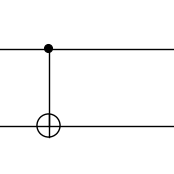

In [34]:
# Define cnot gate from python library
C = CNOT(1,0)

# Show matrix and quantum circuit representation
(represent(C, nqubits=2), circuit_plot(C, nqubits=2))

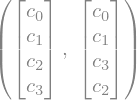

In [36]:
c_0, c_1, c_2, c_3 = symbols("c_0, c_1, c_2, c_3")
ket_psi = Matrix([[c_0], [c_1], [c_2], [c_3]])

# Define CX/CNOT matrix
CX = Matrix([
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0]])
# apply to ket psi to swap the elements of the bottom right quadrant
CX_on_ket_psi = CX * ket_psi

(ket_psi, CX_on_ket_psi)

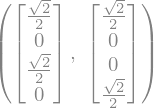

In [41]:
# Define the common states
qubits = (Matrix([[1], [0]]), Matrix([[0], [1]]), Matrix([[c_0], [c_1]]))

# 1-Qubit
ket_0 = qubits[0]
ket_1 = qubits[1]
ket_plus = 1/sqrt(2)*(ket_0 + ket_1)
ket_minus = 1/sqrt(2)*(ket_0 - ket_1)
ket_i = 1/sqrt(2)*(ket_0 + I*ket_1)
ket_minus_i = 1/sqrt(2)*(ket_0 - I*ket_1)
# 1-Qubit
ket_00 = TensorProduct(ket_0, ket_0)
ket_01 = TensorProduct(ket_0, ket_1)
ket_10 = TensorProduct(ket_1, ket_0)
ket_11 = TensorProduct(ket_1, ket_1)

# Example of CNOT application
ket_plus_0 = TensorProduct(ket_plus, ket_0)
# We get |00> and |10>
CX_on_ket_plus_0 = CX * ket_plus_0
# Notice the resulting flip giving us |00> and |11>
(ket_plus_0, CX_on_ket_plus_0)